In [30]:
# importing libraries 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
# importing and reading dataset

ds=pd.read_csv("Social_Network_Ads.csv")
ds

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [32]:
# searching for duplicates
ds.duplicated().sum()


np.int64(33)

In [33]:
# Removing duplicates

ds.drop_duplicates(inplace = True)

In [34]:
# finding missing value

ds.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [35]:
ds.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [36]:
# spliting as independant and dependant variables

x = ds[['Age','EstimatedSalary']]
y = ds[['Purchased']]

In [37]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x), columns = ['Age','EstimatedSalary'])

In [38]:
# spliting the dataset into Trainig and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25,random_state=0)

In [39]:
x_train


,Age,EstimatedSalary
219,59,143000
242,50,88000
211,52,150000
142,35,59000
121,37,72000
...,...,...
347,54,108000
203,41,71000
122,40,75000
48,30,135000


In [43]:
y_test

,Purchased
111,0
277,1
46,0
27,1
81,0
...,...
215,1
287,1
300,1
308,1


In [44]:
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
cls.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [45]:
result=cls.predict(sc.transform([[30, 150000]]))
result

array([0])

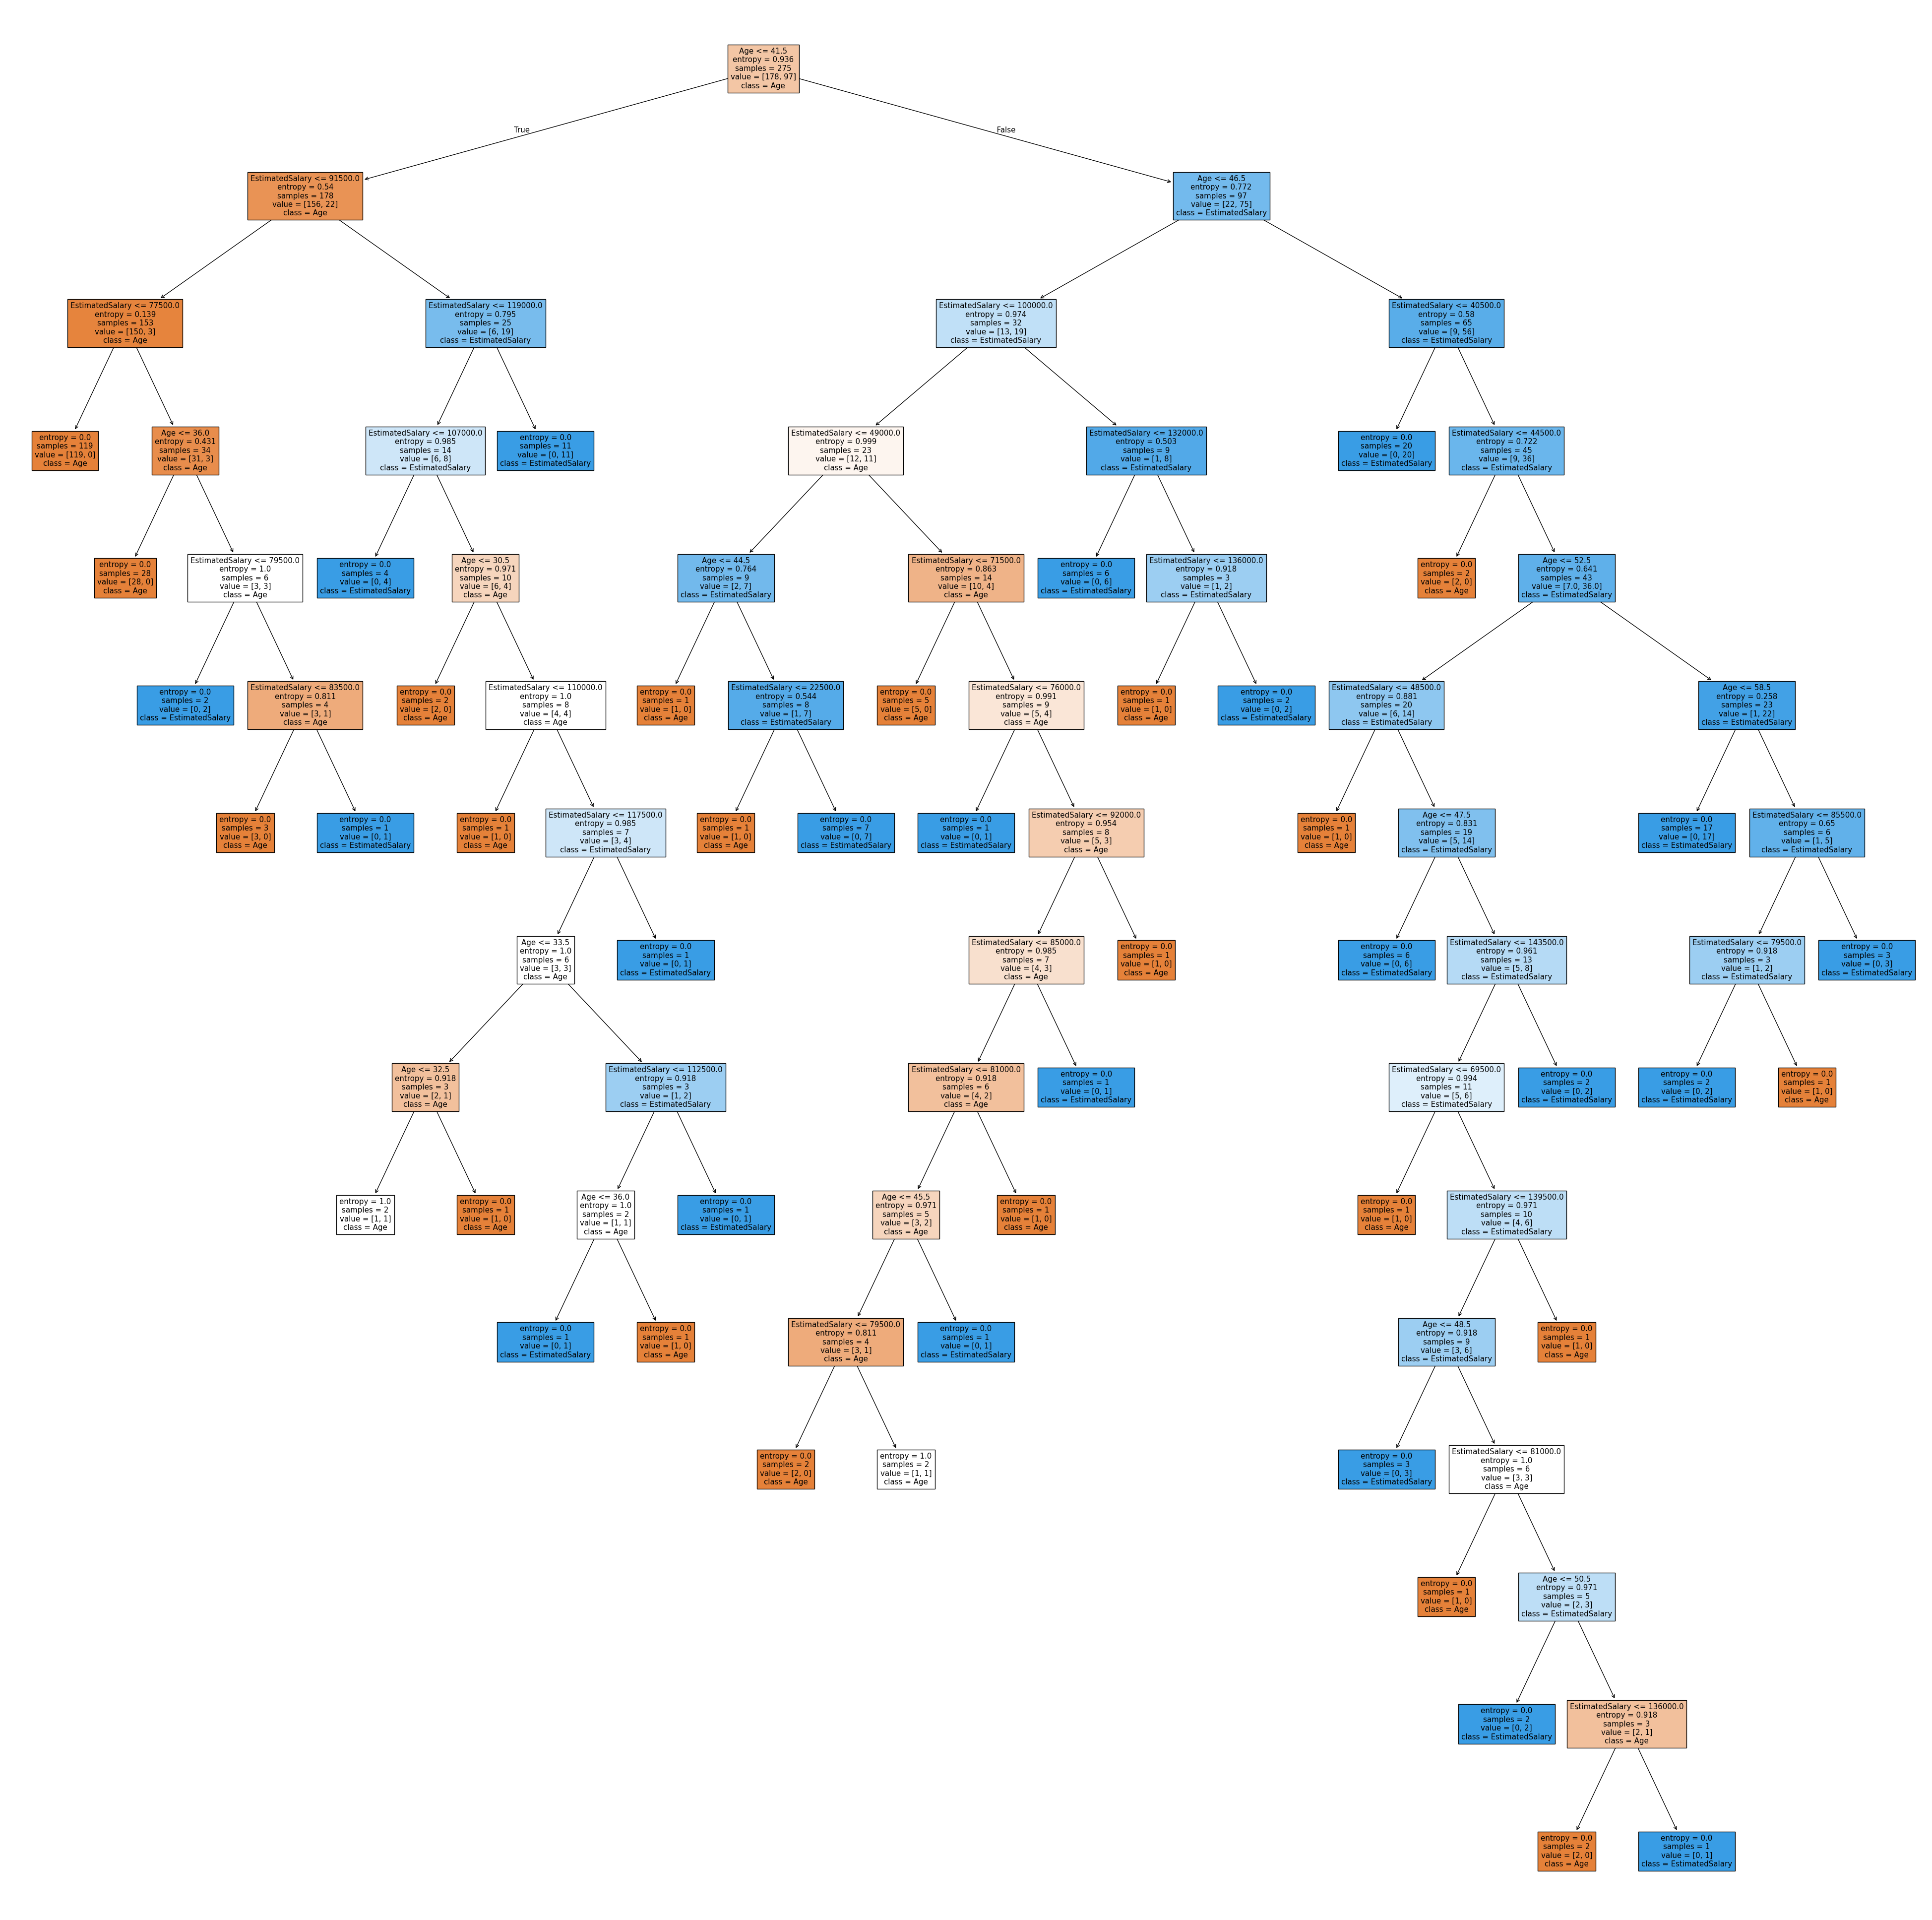

In [46]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(cls, filled=True, feature_names=['Age', 'EstimatedSalary'], class_names=['Age','EstimatedSalary'])
plt.show()

In [58]:
# cheaking Accuracy of Logistic regression model
from sklearn.metrics import accuracy_score

# predict on the test set 
y_pred = cls.predict(x_test)

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model:{accuracy*100:.2f}%f")

Accuracy of the logistic regression model:82.61%f


In [ ]:
# user input
age = float(input("Enter Age: "))
salary = float(input("Enter EstimatedSalary Salary"))

myinput = pd.DataFrame(sc.transform([[age,salary]]), columns=['Age','EstimatedSalary'])
result = cls.predict(myinput)

if result[0]==1:
    print("Prediction: User will purchase plan")
else:
    print("Prediction: User will not purchase plan")

Enter Age:  43
